In [15]:
!pip install mpl_finance
!pip install python-binance


     ---------------------------------------- 65.2/65.2 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 555.1/555.1 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 98.6/98.6 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 288.9/288.9 kB 8.7 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 7.0 MB/s eta 0:00:00
     -------------------------------------- 274.4/274.4 kB 5.6 MB/s eta 0:00:00
     -------------------------------------- 339.5/339.5 kB 4.2 MB/s eta 0:00:00


In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_finance import candlestick_ohlc
import random 
from matplotlib.dates import date2num
import datetime
import binance

In [15]:
a = pd.read_csv('exp.csv', delimiter=';', index_col=[0])
pd.DataFrame(a)

,эксперт 1,эксперт 2,эксперт 3,эксперт 4,эксперт 5,эксперт 6
продукт 1,8,6,6,7,4,8
продукт 2,5,7,5,5,2,7
продукт 3,9,8,9,8,7,4
продукт 4,5,3,4,2,4,6
продукт 5,3,5,5,3,7,3
продукт 6,10,7,9,7,9,6


In [134]:
class expert_evaluations():
    '''
    документация
        '''
    def __init__(self, data):
        self.df = pd.DataFrame(pd.read_csv(data, delimiter=';', index_col=[0]))
    
    def expert(self):
        df = self.df.copy()
        width, length = df.shape[0], df.shape[1]
        square_list = []
        for i, row in df.iterrows():
            square_list.append(row.map(lambda x:x**2))
        square_df = pd.DataFrame(square_list) # датафрейм квадратов

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list) # столбец матожидания

        variance_list = []
        for i, row in df.iterrows():
            variance_list.append(row.var())
        variance_df = pd.DataFrame(variance_list) # столбец дисперсии "дисп.в"

        sum_squre_list = []
        for i, row in square_df.iterrows():
                sum_squre_list.append(row.mean())
        sum_squre_df = pd.DataFrame(sum_squre_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) #столбец квадрат суммы

        general_variance_list = []
        for i in range(len(sum_squre_list)):
            general_variance_list.append(sum_squre_list[i]-square_sum_list[i])
        general_variance_df = pd.DataFrame(general_variance_list) #столбце дисперсий "дисп.г", полученные по формулам

        standart_deviation_general_list = []
        for i in general_variance_list:
            standart_deviation_general_list.append(i**0.5)
        standart_deviation_general_df = pd.DataFrame(standart_deviation_general_list)  #столбец стандартного отклонения "x1" 
                                                                            #(от генеральной совокупности найденного по формулам)
        standart_deviation_sampled_list = []
        for i in variance_list:
            standart_deviation_sampled_list.append(i**0.5)
        standart_deviation_sampled_df = pd.DataFrame(standart_deviation_sampled_list) #столбец стандартного отклонения "x2" 
                                                                            #(от выборки)

        left_margin = [mean_list[i] - standart_deviation_general_list[i] for i in range(len(mean_list))]
        right_margin = [mean_list[i] + standart_deviation_general_list[i] for i in range(len(mean_list))]
        confidence_intervals = [left_margin, right_margin]
        confidence_intervals_df = pd.DataFrame(confidence_intervals).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x1"
        left_margin_x2 = [mean_list[i] - standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        right_margin_x2 = [mean_list[i] + standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        confidence_intervals_x2 = [left_margin_x2, right_margin_x2]
        confidence_intervals_df_x2 = pd.DataFrame(confidence_intervals_x2).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x2"

    #     start="2020-1-1"
    #     data=[]
    #     for i in range(length):    
    #         random_data=[random.randint(2000,2500) for _ in range(4)]
    #         sorted_data=sorted(random_data)
    #         day=date2num(datetime.datetime.strptime(start,'%Y-%m-%d'))
    #         print(day)
    #         if i==0:
    #             one=(day,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])       
    #         else:
    #             one=(day+i,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day+i,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])
    #         data.append(one)

    #     fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
    #     fig.subplots_adjust(bottom=0.1)
    #     ax.xaxis_date()
    #     plt.xticks(rotation=30)
    #     plt.title('K-line')
    #     plt.xlabel('time')
    #     plt.ylabel('price')
    #     candlestick_ohlc(ax,data,width=0.5,colorup='r',colordown='green') 
    #     plt.grid(True)

        return(confidence_intervals_df)
    def rank(self):
        df = self.df.copy()
        width, length = df.shape[0], df.shape[1]

        mediana_list = []
        for i, row in df.iterrows():
            mediana_list.append(row.median())
        mediana_df = pd.DataFrame(mediana_list) # столбец медианы

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list) # столбец матожидания

        square_list=[]
        for i in range(len(mediana_list)):
            square_list.append(list(df.iloc[i].map(lambda x: (x-mean_list[i])**2)))
        square_df = pd.DataFrame(square_list) # датафрейм из (x - E)^2 

        sum_square_list=[]
        for i in range(len(square_list)):
            sum_square_list.append(square_df.iloc[:,i].sum()) # сумма квадратов разностей x и матожидания

        standart_deviation_list=[]
        for i in range(len(sum_square_list)):
            standart_deviation_list.append(sum_square_list[i]/(len(df.iloc[:,i])-1))
        standart_deviation_df = pd.DataFrame(standart_deviation_list) # список стандартных отклонений

        divide_by_one_list=[]
        for i in standart_deviation_list:
            divide_by_one_list.append(1/i)
        divide_by_one_df = pd.DataFrame(divide_by_one_list) # 1/D в экселе (1 делить на стандартное отклонение)

        sum_divided_std = sum(divide_by_one_list) # сумма разделенных на 1 чисел

        expert_competence_ratios = [i/sum_divided_std for i in divide_by_one_list] #КОЭФФИЦИЕНТЫ КОМПИТЕНТНОСТИ ЭКСПЕРТОВ

        df_list=[]
        for i in range(len(expert_competence_ratios)):
            df_list.append(df.iloc[:,i].tolist()) #неважная часть, облистывание главного датасета

        multiply_weighted_average_ranks_list=[]
        for i in range(len(df_list)):
            inner_list=[]
            for e in df_list[i]:
                inner_list.append(expert_competence_ratios[i]*e)
            multiply_weighted_average_ranks_list.append(inner_list)
        multiply_weighted_average_ranks_df = pd.DataFrame(multiply_weighted_average_ranks_list) #произведения коэффициентов на датасет

        weighted_average_ranks = []
        for i in range(len(expert_competence_ratios)):
            weighted_average_ranks.append(multiply_weighted_average_ranks_df.iloc[:,i].sum())
        weighted_average_ranks_df = pd.DataFrame(weighted_average_ranks)
        return(weighted_average_ranks_df) #средневзвешанные ранги

exprt = expert_evaluations('rank.csv')

In [137]:
exprt.expert() #Математическая обработочка экспертных оценочек
exprt.rank() #Математическая обработочка ранговых оценочек

,0
0,2.455376
1,2.975829
2,1.338908
3,5.657126
4,4.768882
5,3.803880


18262.0
18262.0
18262.0
18262.0
18262.0
18262.0


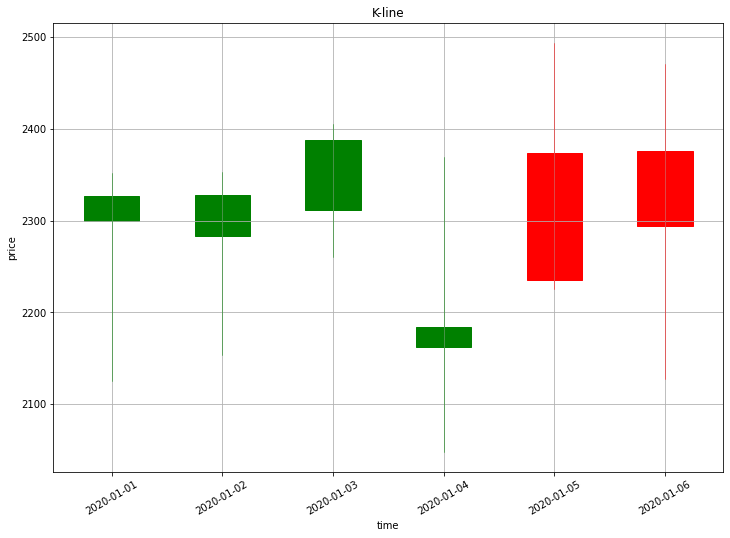

In [33]:
start="2020-1-1"
data=[]
for i in range(6):    
    random_data=[random.randint(2000,2500) for _ in range(4)]
    sorted_data=sorted(random_data)
    day=date2num(datetime.datetime.strptime(start,'%Y-%m-%d'))
    print(day)
    if i==0:
        one=(day,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])       
    else:
        one=(day+i,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2]) if random.random()>0.5 else (day+i,sorted_data[2],sorted_data[3],sorted_data[0],sorted_data[1])
    data.append(one)

fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()
plt.xticks(rotation=30)
plt.title('K-line')
plt.xlabel('time')
plt.ylabel('price')
candlestick_ohlc(ax,data,width=0.5,colorup='r',colordown='green') 
plt.grid(True)
